In [10]:
import MICSAS.interface as misim
from CASS_Driver import drive_tree

# Compute GNN feature vectors for each function

In [11]:
cass_manager = misim.CASSManager()
gnn_preprocessor = misim.GNNPreprocessor('MICSAS/data/datasets/poj/dataset-gnn/vocab.pkl')
gnn_runner = misim.GNNRunner('MICSAS/data/datasets/poj/dataset-gnn/vocab.pkl', 'MICSAS/data/models/poj/gnn/model.pt')

# Compute GNN feature vectors for each function/loop in a source file.
cass_strs = drive_tree(input_file='input_code_ez.c')
#cass_strs = cass_manager.extract_cass_strs_from_src_file('input_code_ez.c', extract_loops=True)
casses, src_ranges = cass_manager.load_casses_from_strs(cass_strs)
inputs = gnn_preprocessor.preprocess_casses_seperated(casses)
vectors = gnn_runner.compute_code_vector_batched(inputs)
print (cass_strs)
for i in range(len(src_ranges)):
     print(src_ranges[i], vectors[i])



['0,0,9,1\t34\tS#FS#1_1\tI#compound_statement#{$}\t1\tI#if_statement#if$$$\t3\tI#condition_clause#($)\t1\tI#binary_expression#$<$\t2\tvn\t-1\t15\tN0\tI#compound_statement#{$}\t1\tI#return_statement#return$;\t1\tN-1\tI#else_clause#else$\t1\tI#if_statement#if$$$\t3\tI#condition_clause#($)\t1\tI#binary_expression#$||$\t2\tI#binary_expression#$==$\t2\tvn\t5\t18\tN0\tI#binary_expression#$==$\t2\tvn\t15\t27\tN1\tI#compound_statement#{$}\t1\tI#return_statement#return$;\t1\tN1\tI#else_clause#else$\t1\tI#compound_statement#{$}\t1\tI#return_statement#return$;\t1\tI#binary_expression#$*$\t2\tvn\t18\t32\tI#call_expression#$$\t2\tFfactorial\tI#argument_list#($)\t1\tI#binary_expression#$-$\t2\tvn\t27\t-1\tN1\t']
SourceRange(start_line=0, start_column=0, end_line=9, end_column=1) [-5.314356   -3.0930176   1.8217988   3.9635184  -1.9093082   2.349143
  0.92427593 -7.880808    2.2437835  -0.07576564  5.4405355   2.9991808
 -4.089292   -1.8519729   6.421213   -2.7545369  -1.2462902   3.7648294
  0.89076

# Compute code similarity between two source files.


In [12]:
# Compute code similarity between two source files.
cass_strs_1 = drive_tree(input_file='test_codes/input_code_1.c')
cass_strs_2 = drive_tree(input_file='test_codes/input_code_2.c')
casses_1, _ = cass_manager.load_casses_from_strs(cass_strs_1)
casses_2, _ = cass_manager.load_casses_from_strs(cass_strs_2)
input_1 = gnn_preprocessor.preprocess_casses_combined(casses_1)
input_2 = gnn_preprocessor.preprocess_casses_combined(casses_2)
vectors = gnn_runner.compute_code_vector_batched([input_1, input_2])
from numpy.linalg import norm
similarity = (vectors[0] @ vectors[1].T) / (norm(vectors[0]) * norm(vectors[1]))
print(similarity)


0.89957684


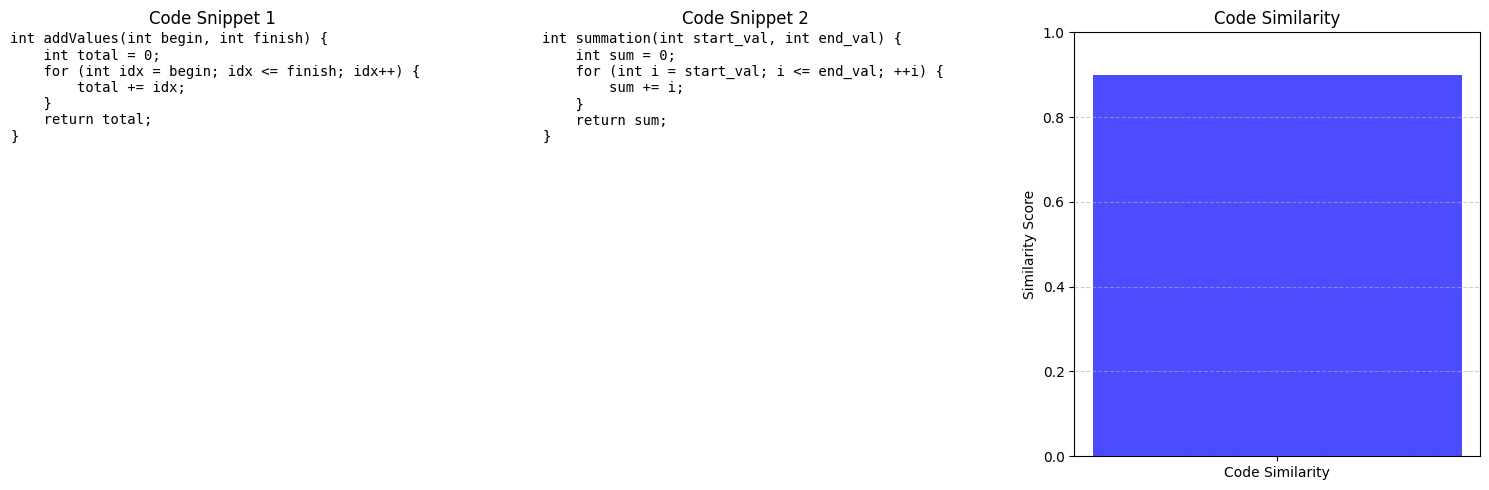

In [13]:
import matplotlib.pyplot as plt

# Paths to the two code files
file_1_path = "test_codes/input_code_1.c"  # Update with your actual file path
file_2_path = "test_codes/input_code_2.c"  # Update with your actual file path

# Read the content of both files
with open(file_1_path, "r") as f1:
    code_snippet_1 = f1.read()

with open(file_2_path, "r") as f2:
    code_snippet_2 = f2.read()

# Create figure with 1 row, 3 columns (Two code snippets + Similarity bar)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Code Snippet 1
axes[0].text(0, 1, code_snippet_1, fontsize=10, family='monospace', verticalalignment='top')
axes[0].axis("off")  # Hide axes
axes[0].set_title("Code Snippet 1")

# Display Code Snippet 2
axes[1].text(0, 1, code_snippet_2, fontsize=10, family='monospace', verticalalignment='top')
axes[1].axis("off")  # Hide axes
axes[1].set_title("Code Snippet 2")

# Plot Similarity Score
axes[2].bar(["Code Similarity"], [similarity], color='blue', alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("Similarity Score")
axes[2].set_title("Code Similarity")
axes[2].grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout to fit text properly
plt.tight_layout()
plt.show()


In [14]:
# Compute code similarity between two source files.
cass_strs_3 = drive_tree(input_file='test_codes/input_code_3.c')
cass_strs_4 = drive_tree(input_file='test_codes/input_code_4.c')
casses_3, _ = cass_manager.load_casses_from_strs(cass_strs_3)
casses_4, _ = cass_manager.load_casses_from_strs(cass_strs_4)
input_3 = gnn_preprocessor.preprocess_casses_combined(casses_3)
input_4 = gnn_preprocessor.preprocess_casses_combined(casses_4)
vectors = gnn_runner.compute_code_vector_batched([input_3, input_4])
from numpy.linalg import norm
similarity = (vectors[0] @ vectors[1].T) / (norm(vectors[0]) * norm(vectors[1]))
print(similarity)


0.86912656


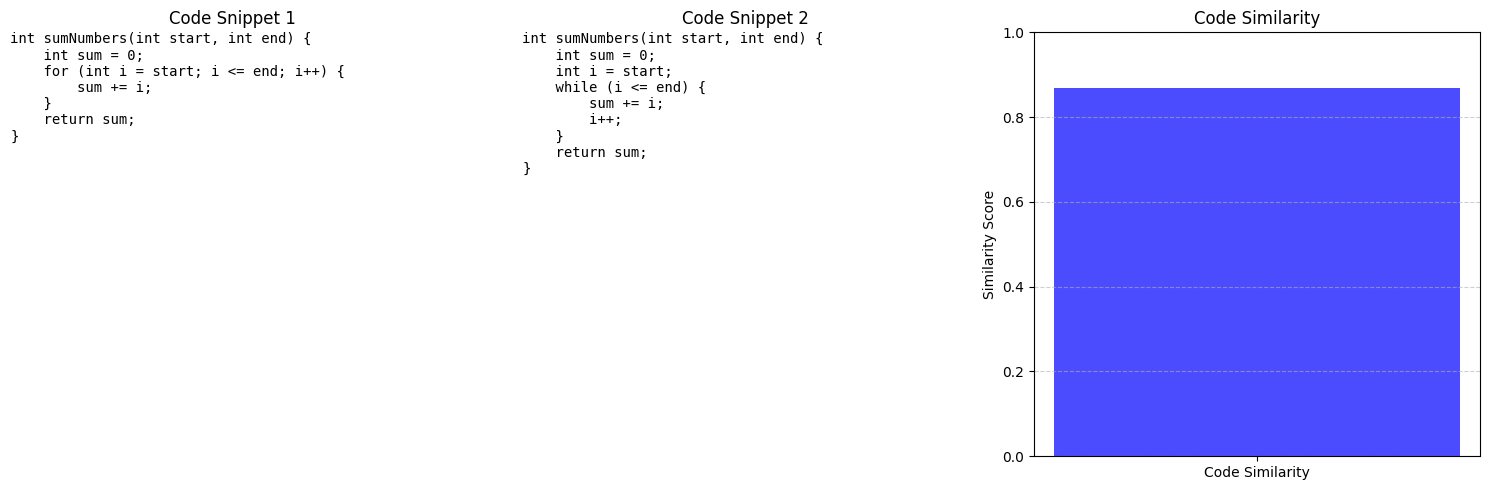

In [15]:
import matplotlib.pyplot as plt

# Paths to the two code files
file_1_path = "test_codes/input_code_3.c"  # Update with your actual file path
file_2_path = "test_codes/input_code_4.c"  # Update with your actual file path

# Read the content of both files
with open(file_1_path, "r") as f1:
    code_snippet_1 = f1.read()

with open(file_2_path, "r") as f2:
    code_snippet_2 = f2.read()

# Create figure with 1 row, 3 columns (Two code snippets + Similarity bar)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Code Snippet 1
axes[0].text(0, 1, code_snippet_1, fontsize=10, family='monospace', verticalalignment='top')
axes[0].axis("off")  # Hide axes
axes[0].set_title("Code Snippet 1")

# Display Code Snippet 2
axes[1].text(0, 1, code_snippet_2, fontsize=10, family='monospace', verticalalignment='top')
axes[1].axis("off")  # Hide axes
axes[1].set_title("Code Snippet 2")

# Plot Similarity Score
axes[2].bar(["Code Similarity"], [similarity], color='blue', alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("Similarity Score")
axes[2].set_title("Code Similarity")
axes[2].grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout to fit text properly
plt.tight_layout()
plt.show()


In [16]:
cass_strs_5 = drive_tree(input_file='test_codes/input_code_5.c')
cass_strs_6 = drive_tree(input_file='test_codes/input_code_6.c')
casses_5, _ = cass_manager.load_casses_from_strs(cass_strs_5)
casses_6, _ = cass_manager.load_casses_from_strs(cass_strs_6)
input_5 = gnn_preprocessor.preprocess_casses_combined(casses_5)
input_6 = gnn_preprocessor.preprocess_casses_combined(casses_6)
vectors = gnn_runner.compute_code_vector_batched([input_5, input_6])
from numpy.linalg import norm
similarity = (vectors[0] @ vectors[1].T) / (norm(vectors[0]) * norm(vectors[1]))
print(similarity)


0.7654261


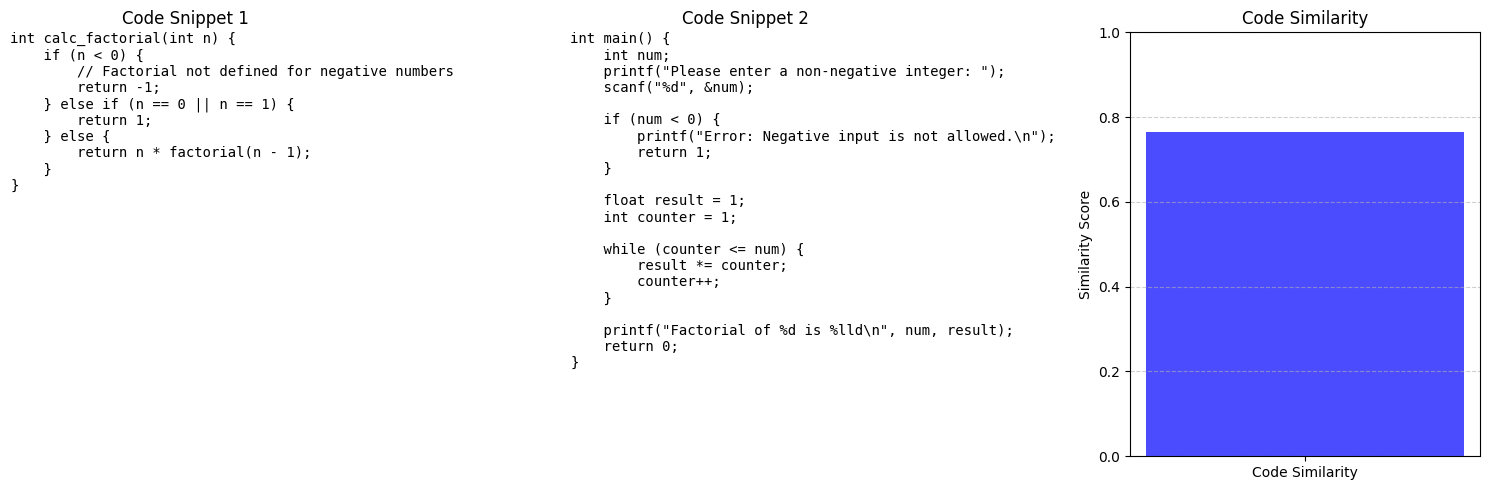

In [17]:
import matplotlib.pyplot as plt

# Paths to the two code files
file_1_path = "test_codes/input_code_5.c"  # Update with your actual file path
file_2_path = "test_codes/input_code_6.c"  # Update with your actual file path

# Read the content of both files
with open(file_1_path, "r") as f1:
    code_snippet_1 = f1.read()

with open(file_2_path, "r") as f2:
    code_snippet_2 = f2.read()

# Create figure with 1 row, 3 columns (Two code snippets + Similarity bar)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Code Snippet 1
axes[0].text(0, 1, code_snippet_1, fontsize=10, family='monospace', verticalalignment='top')
axes[0].axis("off")  # Hide axes
axes[0].set_title("Code Snippet 1")

# Display Code Snippet 2
axes[1].text(0, 1, code_snippet_2, fontsize=10, family='monospace', verticalalignment='top')
axes[1].axis("off")  # Hide axes
axes[1].set_title("Code Snippet 2")

# Plot Similarity Score
axes[2].bar(["Code Similarity"], [similarity], color='blue', alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("Similarity Score")
axes[2].set_title("Code Similarity")
axes[2].grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout to fit text properly
plt.tight_layout()
plt.show()